In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
import requests
import zipfile
import os

#Define input image shape
input_shape = (500, 500, 3)

#Download and extract data
import pathlib
url = "https://github.com/grace030524/AER850-Project-2/raw/refs/heads/main/Project%202%20Data.zip"
zip = './Project2Data.zip'
extract = './Project2Data'
response = requests.get(url)
with open(zip, 'wb') as file:
    file.write(response.content)
with zipfile.ZipFile(zip, 'r') as zip_ref:
    zip_ref.extractall(extract)
os.remove(zip)

In [ ]:
#Establish data directory
train_dir = os.path.join('./Project2Data/Data', 'train')
valid_dir = os.path.join('./Project2Data/Data', 'valid')


In [ ]:
#Augmentation
train_aug = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomZoom(0.2),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])
valid_aug = tf.keras.Sequential([
    layers.Rescaling(1./255),
])
imagesize = (500,500)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=imagesize,
    color_mode="rgb",
    batch_size=32,
    label_mode='categorical',
    shuffle=True
)
train_ds = train_data.map(lambda x, y: (train_aug(x, training=True), y))

valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    image_size=imagesize,
    color_mode="rgb",
    batch_size=32,
    label_mode='categorical',
    shuffle=True
)
valid_ds = valid_data.map(lambda x, y: (valid_aug(x, training=True), y))

Found 1942 files belonging to 3 classes.
Found 431 files belonging to 3 classes.


In [ ]:
#Building model
from tensorflow.keras import layers, models
input_shape = (500, 500, 3)
#Base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 498, 498, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 249, 249, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 247, 247, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 123, 123, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 121, 121, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │       3,686,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,705,923 (14.14 MB)

 Trainable params: 3,705,923 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

compilation = model.fit(train_ds, epochs=10,
                    validation_data=valid_ds)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 816s 13s/step - accuracy: 0.4156 - loss: 1.5127 - val_accuracy: 0.4780 - val_loss: 1.0471
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 854s 14s/step - accuracy: 0.5277 - loss: 0.9499 - val_accuracy: 0.5383 - val_loss: 0.9423
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 850s 14s/step - accuracy: 0.6004 - loss: 0.8603 - val_accuracy: 0.6566 - val_loss: 0.7618
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 803s 13s/step - accuracy: 0.6972 - loss: 0.7362 - val_accuracy: 0.6427 - val_loss: 0.7537
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 869s 13s/step - accuracy: 0.7062 - loss: 0.7161 - val_accuracy: 0.5661 - val_loss: 0.9279
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 801s 13s/step - accuracy: 0.6701 - loss: 0.7603 - val_accuracy: 0.6520 - val_loss: 0.7328
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 832s 14s/step - accuracy: 0.6983 - loss: 0.6830 - val_accuracy: 0.6218 - val_loss: 0.7277
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 803s 13s/step - accuracy: 0.7367 - loss: 0.6446 - val_accuracy: 0.

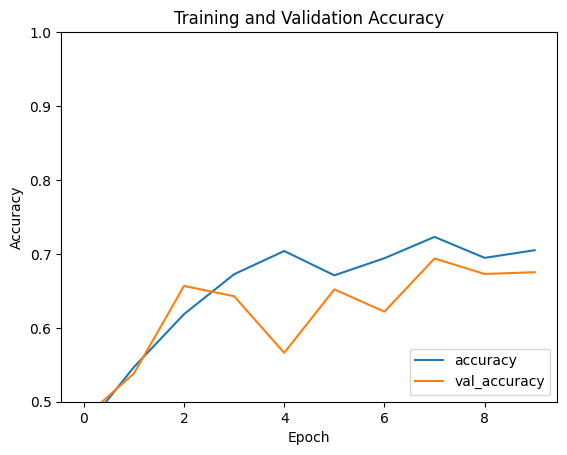

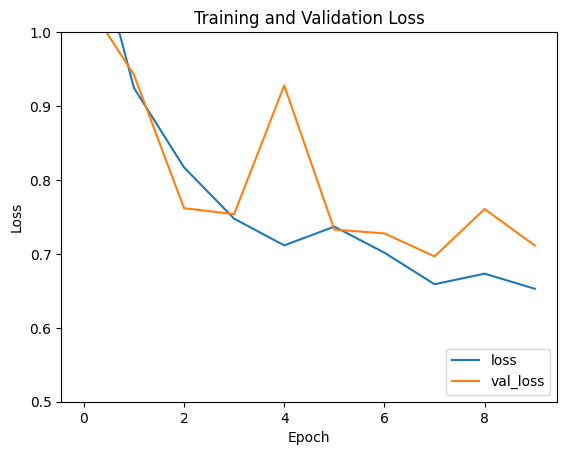

In [ ]:
#Evaluation
import matplotlib.pyplot as plt
plt.plot(compilation.history['accuracy'], label='accuracy')
plt.plot(compilation.history['val_accuracy'], label = 'val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(compilation.history['loss'], label='loss')
plt.plot(compilation.history['val_loss'], label = 'val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save("model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


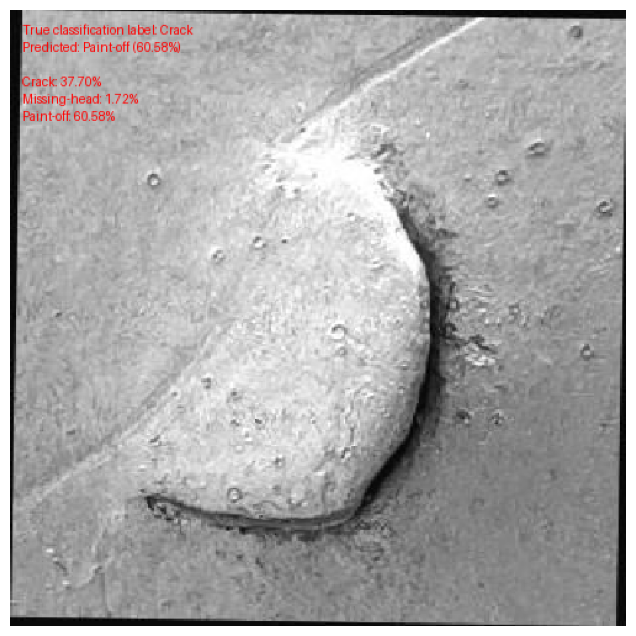

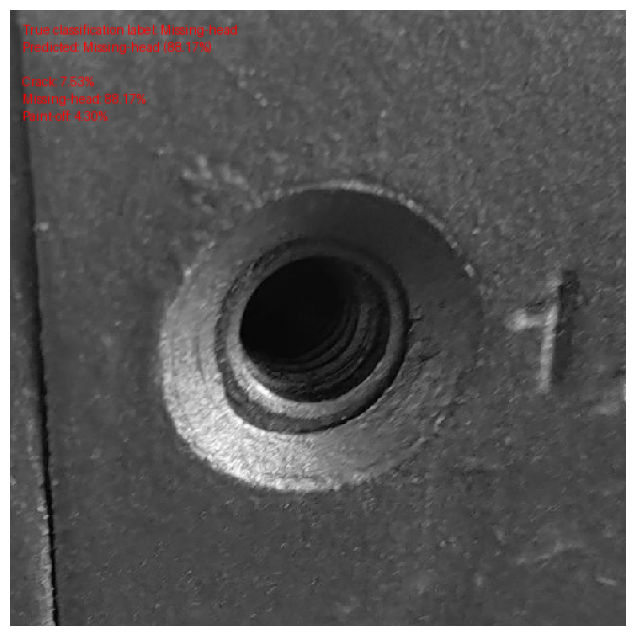

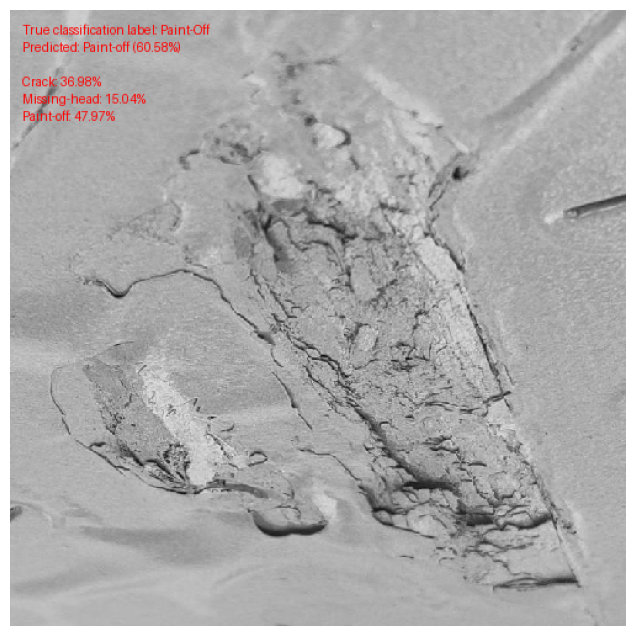

In [ ]:
#Step5
import numpy as np
from PIL import Image, ImageDraw, ImageFont
crack = tf.keras.preprocessing.image.load_img('./Project2Data/Data/test/crack/test_crack.jpg',  target_size=imagesize)
mh = tf.keras.preprocessing.image.load_img('./Project2Data/Data/test/missing-head/test_missinghead.jpg',  target_size=imagesize)
po = tf.keras.preprocessing.image.load_img('./Project2Data/Data/test/paint-off/test_paintoff.jpg',  target_size=imagesize)

crar = tf.keras.preprocessing.image.img_to_array(crack)
mhar = tf.keras.preprocessing.image.img_to_array(mh)
poar = tf.keras.preprocessing.image.img_to_array(po)

crtest = crar/255
mhtest = mhar/255
potest = poar/255

crtest = np.expand_dims(crtest, axis=0)
mhtest = np.expand_dims(mhtest, axis=0)
potest = np.expand_dims(potest, axis=0)

model = tf.keras.models.load_model('model.keras')

# Perform prediction
predictcr = model.predict(crtest)[0]
predictmh = model.predict(mhtest)[0]
predictpo = model.predict(potest)[0]
classcr = np.argmax(predictcr)
classmh = np.argmax(predictmh)
classpo = np.argmax(predictpo)

class_labels = {0: 'Crack', 1: 'Missing-head', 2: 'Paint-off'}

#Crack
predictindex = np.argmax(predictcr)
predictlabel = class_labels[predictindex]
predictprob = predictcr[predictindex]

text1 = f"Predicted: {predictlabel} ({predictprob:.2%})"
text2 = "\n".join([f"{class_labels[i]}: {predictcr[i]:.2%}" for i in range(len(predictcr))])
text3 = f"True classification label: Crack\n{text1}\n\n{text2}"

crresult = crack.copy()
draw = ImageDraw.Draw(crresult)
try:
    font = ImageFont.truetype("arial.ttf", 1000)  # Adjust font size as needed
except IOError:
    font = ImageFont.load_default()

text_position = (10, 10)  # Position for the text on the image
text_color = (255, 0, 0)  # Text color (red in RGB)
draw.text(text_position, text3, fill=text_color, font=font)
plt.figure(figsize=(8, 8))
plt.imshow(crresult)
plt.axis('off')  # Hide axes
plt.show()

#Missing-head
predictindex = np.argmax(predictmh)
predictlabel = class_labels[predictindex]
predictprob = predictmh[predictindex]

text1 = f"Predicted: {predictlabel} ({predictprob:.2%})"
text2 = "\n".join([f"{class_labels[i]}: {predictmh[i]:.2%}" for i in range(len(predictmh))])
text3 = f"True classification label: Missing-head\n{text1}\n\n{text2}"

mhresult = mh.copy()
draw = ImageDraw.Draw(mhresult)
try:
    font = ImageFont.truetype("arial.ttf", 1000)  # Adjust font size as needed
except IOError:
    font = ImageFont.load_default()

text_position = (10, 10)  # Position for the text on the image
text_color = (255, 0, 0)  # Text color (red in RGB)
draw.text(text_position, text3, fill=text_color, font=font)
plt.figure(figsize=(8, 8))
plt.imshow(mhresult)
plt.axis('off')  # Hide axes
plt.show()

#Paint-off
predictindex = np.argmax(predictpo)
predictlabel = class_labels[predictindex]
predictprob = predictcr[predictindex]

text1 = f"Predicted: {predictlabel} ({predictprob:.2%})"
text2 = "\n".join([f"{class_labels[i]}: {predictpo[i]:.2%}" for i in range(len(predictpo))])
text3 = f"True classification label: Paint-Off\n{text1}\n\n{text2}"

poresult = po.copy()
draw = ImageDraw.Draw(poresult)
try:
    font = ImageFont.truetype("arial.ttf", 1000)  # Adjust font size as needed
except IOError:
    font = ImageFont.load_default()

text_position = (10, 10)  # Position for the text on the image
text_color = (255, 0, 0)  # Text color (red in RGB)
draw.text(text_position, text3, fill=text_color, font=font)
plt.figure(figsize=(8, 8))
plt.imshow(poresult)
plt.axis('off')  # Hide axes
plt.show()